# Analysis

In [101]:
import pandas as pd

In [104]:
df = pd.read_csv("final_dataset.csv")
df.head(5)

,id,nome,ano_registo,type,n_reg,lat,lon,score_global,score_location,score_price/quality
0,3,camões apartment,2016.0,Apartamento,28842/AL,41.155397,-8.610221,9.4,9.1,9.6
1,36,alojamento ferreira borges,2016.0,Apartamento,35755/AL,41.142301,-8.615038,7.9,9.6,7.3
2,47,brigitte aurran,2013.0,Moradia,5406/AL,41.152017,-8.612235,NaN,NaN,NaN
3,63,my home in porto ii,2016.0,Apartamento,37939/AL,41.162902,-8.623336,9.2,8.3,9.0
4,78,residencial d.duarte i,2011.0,Estabelecimento de hospedagem,12275/AL,41.145786,-8.597590,7.4,8.0,7.7


# Clustering

In [105]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [110]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [129]:
df_cl = df[["ano_registo", "lat", "lon", "score_global", "score_location", "score_price/quality"]]
df_cl.dropna(inplace=True)
df_cl.head(5)

c:\users\m\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ano_registo,lat,lon,score_global,score_location,score_price/quality
0,2016.0,41.155397,-8.610221,9.4,9.1,9.6
1,2016.0,41.142301,-8.615038,7.9,9.6,7.3
3,2016.0,41.162902,-8.623336,9.2,8.3,9.0
4,2011.0,41.145786,-8.597590,7.4,8.0,7.7
5,2010.0,41.155123,-8.603039,8.3,7.9,8.4


In [115]:
kmeans = KMeans(n_clusters=10, random_state=0, algorithm="full").fit(df_cl)

In [117]:
print(kmeans.labels_)

[0 6 0 3 3 7 6 3 3 1 7 0 0 6 1 0 7 3 9 3 1 0 3 6 6 6 0 7 6 1 0 0 7 6 0 0 3
 7 1 6 6 1 6 0 0 1 0 1 0 1 6 0 3 6 0 0 0 0 0 0 6 6 7 1 7 7 7 7 7 7 7 7 7 7
 7 0 6 7 7 7 7 7 0 7 7 7 0 0 0 0 0 7 3 7 7 7 7 7 7 7 7 7 3 0 0 0 0 0 0 7 7
 0 0 7 7 7 7 0 0 7 0 0 0 0 0 7 0 7 0 6 0 0 0 0 6 0 0 0 0 0 0 0 7 7 7 7 0 0
 6 6 0 0 0 7 7 0 6 6 7 7 6 0 0 0 0 0 0 7 7 7 4 4 4 2 2 5 4 4 4 4 4 6 4 4 2
 2 6 5 2 6 2 2 2 2 4 2 2 4 2 6 6 6 6 6 4 2 4 2 2 5 4 1 4 4 4 4 4 4 4 4 4 2
 4 6 4 2 2 2 2 4 2 2 4 2 4 2 5 6 4 6 4 2 4 2 2 2 4 2 2 4 2 6 6 2 2 2 2 4 4
 2 2 1 2 2 4 4 4 4 1 4 4 4 6 6 4 2 4 4 4 4 4 4 4 4 4 6 4 1 4 4 2 2 2 2 2 2
 2 4 2 4 4 2 4 4 2 2 4 4 2 4 2 2 4 4 4 2 2 4 2 2 1 2 1 2 4 2 2 2 2 2 1 1 1
 1 1 2 6 6 6 6 2 2 2 2 2 4 6 4 2 2 6 5 2 6 4 6 2 2 4 4 6 4 6 1 2 2 6 4 2 2
 2 4 4 4 4 4 4 4 4 5 4 4 4 2 2 5 6 2 4 4 4 4 6 4 4 6 6 2 6 1 2 2 4 4 2 4 4
 4 6 4 2 4 4 4 4 4 4 2 4 2 4 8 8 8 8 8 5 8 4 5 8 8 8 8 4 8 8 8 8 8 8 8 8 4
 8 1 4 4 4 4 5 8 8 8 8 8 8 8 8 8 8 8 5 8 8 8 8 8 8 8 8 8 4 4 8 8 8 8 8 4 8
 5 4 8 4 4 4 4 8 8 8 8 4 

In [119]:
centroids = kmeans.cluster_centers_
print(len(centroids))
print(centroids)

10
[[ 2.01600000e+03  4.11506823e+01 -8.61038808e+00  9.16231884e+00
   9.39565217e+00  8.98260870e+00]
 [ 2.01646154e+03  4.11486519e+01 -8.61093972e+00 -1.00000000e+00
   9.26538462e+00  8.39615385e+00]
 [ 2.01700000e+03  4.11528769e+01 -8.61032543e+00  8.83406593e+00
   8.95714286e+00  8.63956044e+00]
 [ 2.01090909e+03  4.11488593e+01 -8.60796685e+00  7.68181818e+00
   8.44545455e+00  7.65454545e+00]
 [ 2.01725694e+03  4.11498303e+01 -8.61085130e+00  9.45069444e+00
   9.63680556e+00  9.26319444e+00]
 [ 2.01741667e+03  4.11541491e+01 -8.60937192e+00  6.38333333e+00
   7.40000000e+00  6.10833333e+00]
 [ 2.01641071e+03  4.11513680e+01 -8.60899212e+00  7.79464286e+00
   8.39285714e+00  7.70535714e+00]
 [ 2.01466071e+03  4.11479074e+01 -8.61127059e+00  9.04464286e+00
   9.46785714e+00  8.80892857e+00]
 [ 2.01800000e+03  4.11529268e+01 -8.61255317e+00  8.65070423e+00
   8.75211268e+00  8.46056338e+00]
 [ 2.01000000e+03  4.11474675e+01 -8.61575841e+00 -1.00000000e+00
   9.10000000e+00  7.3

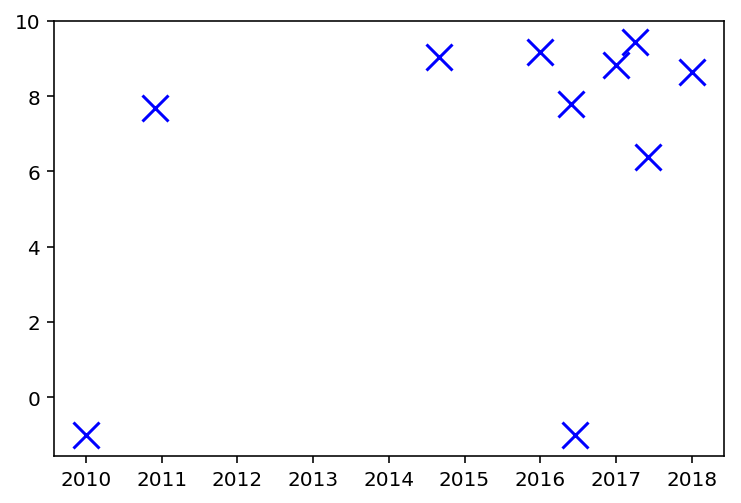

In [121]:
plt.scatter(centroids[:, 0], centroids[:, 3], marker='x', s=169, linewidths=3, color='b', zorder=10)
plt.show()

ideal clusters =  2 with a gain of 561.3536917809397


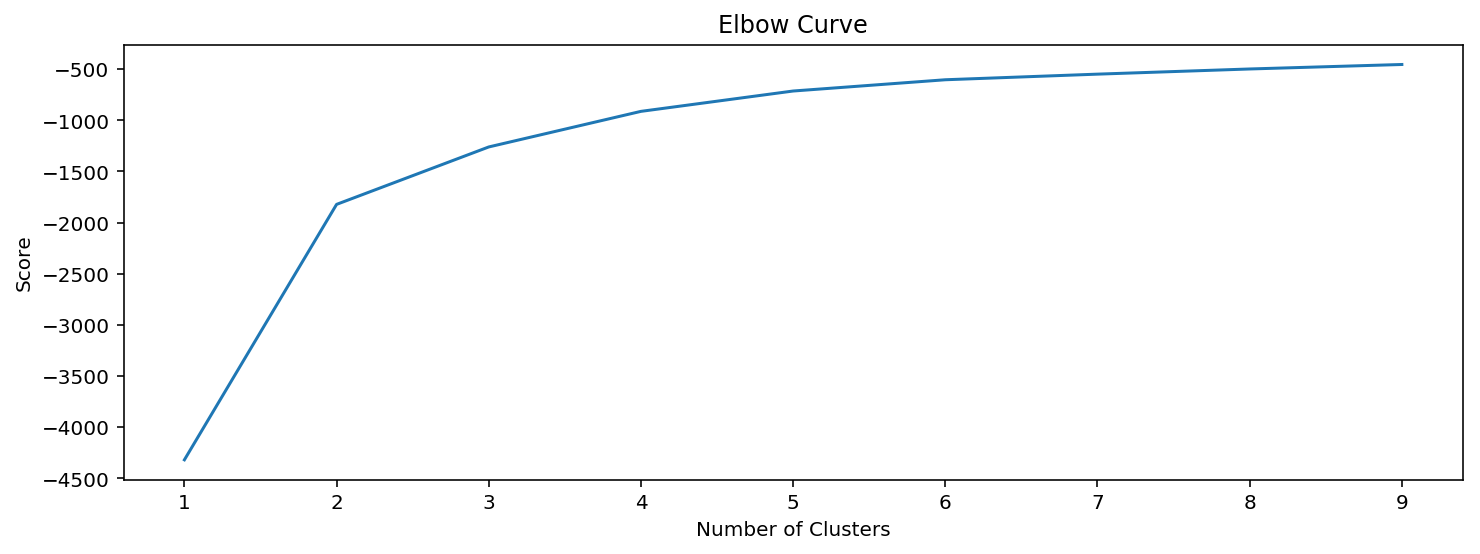

In [126]:
Nc = range(1,10)
kmeans = [KMeans(n_clusters=i, random_state=0) for i in Nc]
score = [kmeans[i].fit(df_cl).score(df_cl) for i in range(len(kmeans))]

# calculate best k
var, start = [], score[0]
for s in score[1:]: var.append(abs(start-s)); start = s
var=var[1:]
print("ideal clusters = ", 2 + var.index(max(var)), "with a gain of", max(var))

# plot curve
plt.figure(figsize=(12,4))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
# plt.show()
plt.savefig("pics/elbow.png", bbox_inches='tight')

# Regression

In [127]:
from sklearn.linear_model import LinearRegression

In [130]:
df_r = df[["ano_registo", "lat", "lon", "score_global", "score_location", "score_price/quality"]]
# df_r.dropna(inplace=True)
df_r.head(5)

,ano_registo,lat,lon,score_global,score_location,score_price/quality
0,2016.0,41.155397,-8.610221,9.4,9.1,9.6
1,2016.0,41.142301,-8.615038,7.9,9.6,7.3
2,2013.0,41.152017,-8.612235,NaN,NaN,NaN
3,2016.0,41.162902,-8.623336,9.2,8.3,9.0
4,2011.0,41.145786,-8.597590,7.4,8.0,7.7


In [100]:
df_x, df_y = df_r

,id,nome,ano_registo,type,n_reg,lat,lon,score
0,141,caldeireiros,2016,Apartamento,25307/AL,41.145349,-8.613683,"{'global': 9.0, 'staff': 8.5, 'commodities': 8..."
1,241,hospedaria do bonfim,2013,Estabelecimento de hospedagem,5644/AL,41.150024,-8.595375,"{'global': 6.6, 'staff': 7.4, 'commodities': 5..."
2,457,alegria rooms,2016,Estabelecimento de hospedagem,31660/AL,41.146709,-8.603717,"{'global': 8.2, 'staff': 8.8, 'commodities': 7..."
3,495,casa paraíso,2016,Apartamento,32765/AL,41.157550,-8.608751,"{'global': 9.5, 'staff': 10.0, 'commodities': ..."
4,582,o santo da lapa,2016,Moradia,31616/AL,41.158944,-8.613953,"{'global': 8.4, 'staff': 9.1, 'commodities': 8..."
5,622,home mcm,2016,Apartamento,37099/AL,41.151401,-8.590309,"{'global': 9.2, 'staff': 9.6, 'commodities': 9..."
6,1770,santa catarina apartments,2016,Apartamento,34309/AL,41.152873,-8.604940,"{'global': 7.5, 'staff': 7.9, 'commodities': 6..."
7,2248,santa catarina apartments,2017,Apartamento,49359/AL,41.154968,-8.604482,"{'global': 7.5, 'staff': 7.9, 'commodities': 6..."
8,2473,a nossa casa,2017,Apartamento,57192/AL,41.171335,-8.657675,"{'global': 9.4, 'staff': 9.7, 'commodities': 9..."
9,2639,db 24 agosto i,2017,Apartamento,48889/AL,41.147365,-8.600058,"{'global': 9.5, 'staff': 9.3, 'commodities': 9..."


In [ ]:
reg = LinearRegression().fit(X, y)